# 🕵️‍♂️ A System for logging my trades which will be used for the purpose of Data analysis

## 1. Problem
I want to be able to closely inspect my trading to get a better perspective on what can be improved as well as what is working and what doesnt. I would like to automate this art of the process as much as possible so I can focus on analyzing the data

## 2. Data
The data I am using here  is from exporting my trades at the end of my trading session (In these trades, A typical trading session was 7AM - 2-3PM EST, This was inefficent because there are rare moments where there is a lot of volatility between 7-9 as well as trading during the open places more risk on the table than I anticipated)

## 3. Evaluation
The evaluation here is a continuous process. I would calculate my win rate and win factor to gauge my profitability, as well as look at which strategies I perform better with

## 4. Features
Here is some information on the data
* Account: The trading account trades were taking place on
* Date/Time: Date and Time each trade took place
* Symbol: FInancial asset that I am currently trading
* Side: Whether I am buying or selling
* Order Type: Whether the order placed was a Market order (Order places by clicking the buy or sell button) or Limit order (Order set to execute at a specific price)
* Quantity: How many contracts on the specific symbol was placed with the order
* Price: Self explanaotry really
* Gross P/L: How much was lost/earned with each position
* Fee: The fee amount that was charged to open/close each contract
* Net P/L: This is essentially the amount lost/earned with the fee
* CONSIDERATION(s): The way the platform I'm using works, Each position I open and close, becomes two seperate rows of data. As opposed to other trading platforms, each row of data is addressing when i open a postion and a seperate row of data for when I close a postion

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta,datetime
import seaborn as sns
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [5]:
trade_log_ts_p1 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 17 2024.csv")
trade_log_ts_p2 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 22 2024.csv")
trade_log_ts_p3 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 23 2024.csv")
trade_log_ts_p4 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 24 2024.csv")
trade_log_ts_p5 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 25 2024.csv")
trade_log_ts_p6 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 26 2024.csv")
trade_log_ts_p7 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 29.csv")
trade_log_ts_p8 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 30 2024.csv")
trade_log_ts_p9 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Jan 31 2024.csv")
trade_log_ts_p10 = pd.read_csv(r"C:\Users\Manic\Documents\Data-Science-Projects\Trading Logs\Raw Trading Csvs\Topstep CSVs\Trades Feb 1 2024.csv")
trade_log_ts = pd.concat([trade_log_ts_p1, trade_log_ts_p2, trade_log_ts_p3, trade_log_ts_p4, trade_log_ts_p5, trade_log_ts_p6, trade_log_ts_p7, trade_log_ts_p8, trade_log_ts_p9,trade_log_ts_p10], ignore_index=True)
#trade_log_ts.tail(25)

In [6]:
column_mapping = { 'Account': 'Account',
                  'Date/Time' : 'Date/Time',
                  'Symbol' : 'Symbol',
                  'Side' : 'Side',
                  'Order type': 'Order-Type',
                  'Quantity' : 'Quantity',
                  'Price' : 'Price',
                  'Gross P/L' : 'GrossP/L',
                  'Fee' : 'Fee',
                  'Net P/L' : 'NetP/L',
                  'Connection name' : 'Connection-name' }
#Renaming the columns
trade_log_ts.rename(columns=column_mapping, inplace=True)
trade_log_ts['NetP/L'] = trade_log_ts['NetP/L'].astype(float)
trade_log_ts['Fee'] = trade_log_ts['Fee'].astype(float)
trade_log_ts['Date/Time']=trade_log_ts['Date/Time'].str.rsplit('-',n=1).str[0] #ONLY USEFUL ONE HAD TO DELETE TIMEZONE
#trade_log_ts.sort_values('Date/Time',inplace=True)
trade_log_ts.drop('Unnamed: 11', axis =1,inplace=True,errors='ignore')
# Building arrays of indexes to fil in the strategy columns and rule counters in the associated rows
tf = [0,1,2,3,4,6,8,9,10,11,12,13,14,15,24,25,26,29,32,33,48,49,70,71,72,73,74,77,80,82,86,87,90,
      91,92,102,106,107,119,120,121,123,160,161,162,164,165,168,169,172,173,174,175,177,178,181,182,184,185,186,189,190,191,192,194]
tf_ladder=[5,7,16,17,34,35,36,37,38,39,40,41,42,44,75,76,122,163,166,167,170,171,176,179,180,187,188,193]
revenge=[18,19,20,21,22,23,27,28,68,69]
accident=[30,31,46,47,43,45,78,79,81,83,102,103,104,183,195,205,206]
mean_rev=[50,51,52,60,61,62,63,64,65,66,67]
mean_rev_ladder=[53,54,54,55,56,57,58,59]
Brk = [58,69,71,83,99,107,47,118,123,129,132,164,172,185]
rev = [133,134,135,136,137,138,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,196,197]
reverse = [198]
panic = []
ctrend = [84,85,88,89,93,94,95,96,97,98,99,100,101,105,112,108,111,113,116,117,118,124,126,127,128,129,130,132,139,142,200,201,202,203]
ctrend_ladder =[109,110,114,115,125,131,140,141,199,204]
# Let's create a rule column
o1rule = []
o2rule = []
o3rule = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,142,150,151,152,153,154,155,156,157,158,159]
o4rule = [5,7,9,10,98,99,100,101,133,134,135,136,137,138,139,140,141,143,144,148,149,196,197,198]
o5rule = [4,6,68,69,84,85,86,87,88,89,93,94,95,96,97,124,125,126,127,145,146,147,175,176,177,184,185,199,200,201,202,203,204,205,206]
o6rule = [0,1,2,3,8,34,35,36,37,38,39,40,41,42,43,44,45,46,47,66,67,70,71,72,73,78,79,81,83,90,91,92,102,103,104,105,112,128,129,130,131,132,
          169,170,171,172,173,174,178,179,180,181,182,183,186,187,188,189]
o7rule = [30,31,32,33,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,74,75,76,77,80,82,106,107,113,114,115,116,117,118,119,120,121,122,
          123,160,161,162,163,164,192,193,194,195]
o8rule = [108,109,110,111,165,166,167,168,190,191]
o9rule = []
#Putting the strategy column and Rules Followed column in place and adding them together
trade_log_ts['Strategy'] = None
trade_log_ts['Rules Followed'] = None
trade_log_ts.loc[tf, 'Strategy'] = 'Trend Following'
trade_log_ts.loc[tf_ladder, 'Strategy'] = 'Trend Following: Laddering in'
trade_log_ts.loc[rev, 'Strategy'] = 'Revenge Trading'
trade_log_ts.loc[accident, 'Strategy'] = 'Accident'
trade_log_ts.loc[mean_rev, 'Strategy'] = 'Mean Reversion'
trade_log_ts.loc[mean_rev_ladder, 'Strategy'] = 'Mean Reversion: Laddering in'
trade_log_ts.loc[ctrend, 'Strategy'] = 'CounterTrend Scalp'
trade_log_ts.loc[ctrend_ladder, 'Strategy'] = 'CountrerTrend Scalp: Laddering in'
trade_log_ts['Status'] = np.where(trade_log_ts['GrossP/L'] == 0, 'Filled', 'Trade Paired')
trade_log_ts.loc[Brk, 'Status'] = 'Break Even'
trade_log_ts.loc[o1rule, 'Rules Followed'] = '1/9'
trade_log_ts.loc[o2rule, 'Rules Followed'] = '2/9'
trade_log_ts.loc[o3rule, 'Rules Followed'] = '3/9'
trade_log_ts.loc[o4rule, 'Rules Followed'] = '4/9'
trade_log_ts.loc[o5rule, 'Rules Followed'] = '5/9'
trade_log_ts.loc[o6rule, 'Rules Followed'] = '6/9'
trade_log_ts.loc[o7rule, 'Rules Followed'] = '7/9'
trade_log_ts.loc[o8rule, 'Rules Followed'] = '8/9'
trade_log_ts.loc[o9rule, 'Rules Followed'] = '9/9'
#trade_log_ts.iloc[69:]
#Needing to drop all trades from the practice account so i dont have to spend forever troubleshooting fixing the Cash Balance column. 
#also amazing to learn about the inverter operator function
#that the tilde key ('~') serves in python here.
#trade_log_ts.iloc[80:120]
#trade_log_ts = trade_log_ts[~trade_log_ts['Account'].str.contains('PRACTICE|PRACTICEJan163114237')] 
#trade_log_ts = trade_log_ts.reset_index(drop=True)

#prac_acc = trade_log_ts[trade_log_ts['Account'].str.contains('PRACTICE|PRACTICEJan163114237')].index
#print(prac_acc)
trade_log_ts.iloc[186:210]

,Account,Date/Time,Symbol,Side,Order-Type,Quantity,Price,GrossP/L,Fee,NetP/L,Connection-name,Strategy,Rules Followed,Status
186,S1Jan163114236,1/31/2024 6:10:21 AM,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4925.50,0.0,0.0,0.0,Topstep,Trend Following,6/9,Filled
187,S1Jan163114236,1/31/2024 6:16:37 AM,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4926.50,0.0,0.0,0.0,Topstep,Trend Following: Laddering in,6/9,Filled
188,S1Jan163114236,1/31/2024 6:21:27 AM,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4927.75,0.0,0.0,0.0,Topstep,Trend Following: Laddering in,6/9,Filled
189,S1Jan163114236,1/31/2024 6:29:17 AM,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-3,4927.50,137.5,0.0,0.0,Topstep,Trend Following,6/9,Trade Paired
190,S1Jan163114236,2/1/2024 8:14:35 AM,ESH4,Buy,Limit(TP for ESH4@CME@S1Jan163114236),1,4885.75,0.0,0.0,0.0,Topstep,Trend Following,8/9,Filled
191,S1Jan163114236,2/1/2024 8:15:12 AM,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4885.75,0.0,0.0,0.0,Topstep,Trend Following,8/9,Filled
192,S1Jan163114236,2/1/2024 8:16:52 AM,ESH4,Buy,Limit(TP for ESH4@CME@S1Jan163114236),1,4884.50,0.0,0.0,0.0,Topstep,Trend Following,7/9,Filled
193,S1Jan163114236,2/1/2024 8:30:04 AM,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4887.50,0.0,0.0,0.0,Topstep,Trend Following: Laddering in,7/9,Filled
194,S1Jan163114236,2/1/2024 8:32:16 AM,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4884.75,12.5,0.0,0.0,Topstep,Trend Following,7/9,Trade Paired
195,S1Jan163114236,2/1/2024 8:32:16 AM,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4884.75,-137.5,0.0,0.0,Topstep,Accident,7/9,Trade Paired


In [7]:
#Now we implement features like the grossP/L, the fees and the netp/L. as well as a cash balance. Luckily I already built all of these
def set_fee(symbol):
    #Define fees with a dictionary
    fees = { 'MNQH4': 0.72, 
             'MESH4': 0.72,
             'MESH3': 0.72, 
             'RTYH4': 2.30, 
             'M2KH4': 0.72,
             'ESH4' : 2.30,
             'NQH4': 2.30,
             'BP6H4': 2.58,
             'CA6H4': 2.58,
             'DA6H4': 2.57,
             'EU6H4': 2.58, 
             'M6BH4': 0.61,
             'M6AH4': 0.61,
           }
    #Set the fee for the symbol
    return fees.get(symbol, 1.00)
trade_log_ts['Fee']=trade_log_ts['Symbol'].apply(set_fee)
trade_log_ts.head()
for idx,_ in trade_log_ts.iterrows():
    trade_log_ts.at[idx, 'Fee'] = trade_log_ts.loc[idx, 'Fee'] * trade_log_ts.loc[idx, 'Quantity']
trade_log_ts['Fee'] = trade_log_ts['Fee'].astype(str).str.replace('-','')
trade_log_ts['Fee'] = trade_log_ts['Fee'].astype(float)


In [8]:
trade_log_ts.sort_values('Date/Time',inplace=True)
net_pl_full = 0 #Initializing NetP/L value
trade_log_ts['Date/Time'] = pd.to_datetime(trade_log_ts['Date/Time'])
dates = trade_log_ts['Date/Time'].dt.date.tolist()

#Full_log= Full_log.reset_index(drop=True)
trade_log_ts.index = range(len(trade_log_ts))
for idx,_ in trade_log_ts.iterrows():
    #Calculate net P/L of each trade
    if idx > 0 and dates[idx] != dates[idx - 1]:
        # New day started, put Net P/L back to 0
        net_pl_full = 0
    net_pl_trade = trade_log_ts.loc[idx, 'GrossP/L'] - trade_log_ts.loc[idx, 'Fee']
    #Update the running total
    net_pl_full += net_pl_trade
    trade_log_ts.at[idx,'NetP/L'] = net_pl_full #Implementing the value in each row of NetP/L
#ALRIGHT NetP/L FEATURE FINISHED
trade_log_ts['Account'] = trade_log_ts['Account'].astype(str)
trade_log_ts.tail(30)

,Account,Date/Time,Symbol,Side,Order-Type,Quantity,Price,GrossP/L,Fee,NetP/L,Connection-name,Strategy,Rules Followed,Status
177,S1Jan163114236,2024-01-31 04:34:31,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-2,4924.00,-112.5,4.6,-121.7,Topstep,Trend Following,5/9,Trade Paired
178,S1Jan163114236,2024-01-31 04:44:22,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4925.50,0.0,2.3,-124.0,Topstep,Trend Following,6/9,Filled
179,S1Jan163114236,2024-01-31 04:49:09,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4927.25,0.0,2.3,-126.3,Topstep,Trend Following: Laddering in,6/9,Filled
180,S1Jan163114236,2024-01-31 04:51:05,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4928.00,0.0,2.3,-128.6,Topstep,Trend Following: Laddering in,6/9,Filled
181,S1Jan163114236,2024-01-31 04:51:11,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4927.50,100.0,2.3,-30.9,Topstep,Trend Following,6/9,Trade Paired
182,S1Jan163114236,2024-01-31 04:51:11,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4927.50,12.5,2.3,-20.7,Topstep,Trend Following,6/9,Trade Paired
183,S1Jan163114236,2024-01-31 04:51:29,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4926.75,-62.5,2.3,-85.5,Topstep,Accident,6/9,Trade Paired
184,S1Jan163114236,2024-01-31 05:01:51,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4924.75,0.0,2.3,-87.8,Topstep,Trend Following,5/9,Filled
185,S1Jan163114236,2024-01-31 05:14:20,ESH4,Sell,Market( for ESH4@CME@S1Jan163114236),-1,4924.75,0.0,2.3,-90.1,Topstep,Trend Following,5/9,Break Even
186,S1Jan163114236,2024-01-31 06:10:21,ESH4,Buy,Market( for ESH4@CME@S1Jan163114236),1,4925.50,0.0,2.3,-92.4,Topstep,Trend Following,6/9,Filled


In [9]:
#CASH BALANCE TIME! Lets Initialize it 
prev_date = None
cash_bal = 50000
roi = 0
trade_log_ts['Cash-Balance']=0 #Adding the Column
trade_log_ts['ROI']=0

# Convert the 'Cash Balance' and 'ROI' column to float type
trade_log_ts['Cash-Balance'] = trade_log_ts['Cash-Balance'].astype(float)
trade_log_ts['ROI'] = trade_log_ts['ROI'].astype(float)

#iterate over each row in the Cash Balance column by adding the NetP?L
for idx, _ in trade_log_ts.iterrows():
    # Checking if the account column has Practice or PRACTICEJan163114237
#    if 'PRACTICE' in trade_log_ts.loc[idx, 'Account'] or 'PRACTICEJan163114237' in trade_log_ts.loc[idx, 'Account']:
#        continue
# Extract the date from the current row
    current_date = trade_log_ts.loc[idx, 'Date/Time'].date()
    if prev_date is not None and current_date != prev_date:
        cash_bal = trade_log_ts.loc[idx -1, 'Cash-Balance']
#        date_change = True
    
    #ROI implementation
    if idx > 0 and current_date == prev_date:
#        cash_bal = trade_log_ts.loc[idx - 1, 'Cash-Balance']
        roi = (trade_log_ts.loc[idx, 'NetP/L'] / trade_log_ts.loc[idx - 1, 'Cash-Balance'] ) * 100
        cash_bal += (trade_log_ts.loc[idx, 'NetP/L'] - trade_log_ts.loc[idx - 1, 'NetP/L'])
    else:        
        cash_bal += (trade_log_ts.loc[idx, 'NetP/L'])
    trade_log_ts.at[idx, 'ROI'] = roi
    trade_log_ts.at[idx, 'Cash-Balance'] = cash_bal
    prev_date = current_date
#trade_log_ts.head(20)

In [10]:
#Let's try to look at the mean value returned from each strategy
#First let's remove the columns that have a gross p/l of 0
trade_log_set = trade_log_ts[trade_log_ts['GrossP/L'] != 0]
grouped_log = trade_log_set.groupby('Strategy')
mean_log = grouped_log['GrossP/L'].mean()
mean_log

Strategy
Accident                        -72.187500
CounterTrend Scalp               43.269231
Mean Reversion                   94.500000
Mean Reversion: Laddering in    -20.833333
Revenge Trading                 -31.944444
Trend Following                  48.843750
Trend Following: Laddering in   -67.142857
Name: GrossP/L, dtype: float64

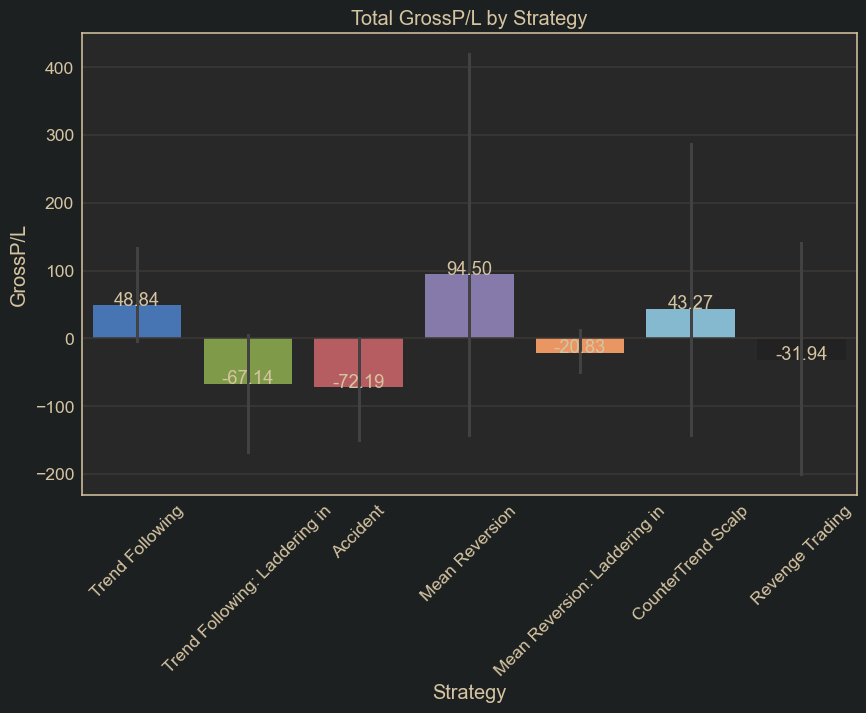

In [11]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Strategy', y='GrossP/L',data=trade_log_set)
# Get the patches(bars) and annotations (labels)
patches = ax.patches
annotations = ax.get_yticklabels()
# iterate over the patches and annotations simultaneously
for patches, annotations in zip(patches, annotations):
    # Get the height of the bar and convert it into a string
    height = patches.get_height()
    height_str = '{:,.2f}'.format(height)
    # Create a text annotation at the top of the bar
    ax.text(patches.get_x() + patches.get_width() / 2., # Position of the text
           height, # Vertical position of the text (At the top of the bar)
           height_str, # Text to display
           ha="center") # Horizontal Alignment
plt.xticks(rotation=45)
plt.title('Total GrossP/L by Strategy')
plt.show()

In [ ]:
# plt.figure(figsize=(10,20))
# sns.boxplot(x='Strategy',y='GrossP/L', data=trade_log_set, vert = False)
# plt.yticks(np.arange(min(trade_log_set['GrossP/L']),max(trade_log_set['GrossP/L']) + 25, 25))
# plt.xticks(rotation=90)
# plt.title('Distribution of Gross P/L by Strategy')
# plt.show()